In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt # plotting tool
import plotly.express as px

In [2]:
coc = xr.open_dataset('/Volumes/RB/WORK/RAW_TG_DATA/1m_processed/coch.nc')
mam = xr.open_dataset('/Volumes/RB/WORK/RAW_TG_DATA/1m_processed/marm.nc')
kar = xr.open_dataset('/Volumes/RB/WORK/RAW_TG_DATA/1m_processed/kara.nc')
sit = xr.open_dataset('/Volumes/RB/WORK/RAW_TG_DATA/1m_processed/sitt.nc')
#convert to dataframe 
df_c = coc.to_dataframe()
df_m = mam.to_dataframe()
df_int_c=df_c.nslott.interpolate(method='linear')
df_int_m=df_m.nslott.interpolate(method='linear')

In [ ]:
#kar.nslott.plot(figsize=(18,5))
#coc.nslott.plot(figsize=(18,5))
#mam.nslott.plot()

fig = px.line(df_int_c.loc['2013-10-01':'2014-11-30'],title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()
#sit.nslott.plot()

In [4]:

#df_int.plot()

In [5]:
# FFT analysis
def FFTanal(inp,w):
    from scipy.signal import savgol_filter, general_gaussian
    w = w
    p = 4
    data = inp.copy()
    x = np.fft.fft(data) # creating FFT 
    X = savgol_filter(x, w, polyorder = p, deriv=0) # smoothing FFT using "Savitzky–Golay smoothing method - https://nirpyresearch.com/savitzky-golay-smoothing-method/" 
    N = len(X)
    print(N)
    n = np.arange(N)
# get the sampling rate
    sr = 1 / (60)
    T = N/sr
    freq = n/T 
# Get the one-sided specturm
    n_oneside = N//2
# get the one side frequency
    f_oneside = freq[:n_oneside]
# convert frequency to hour
    t_h = 1/f_oneside / (60)
    plt.figure(figsize = (12, 6))
    plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside, 'b')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.xticks([0,5,10,15,20,25,30,40,50,60,70,80,90,100,110,120,140,160,180,200])
    plt.xlim(1, 200)
    plt.xlabel('Period ($minutes$)')
    plt.show()
#fftfreq = np.fft.fftfreq(len(df_int))
#plt.plot(fftfreq,fft)
#plt.show()

/Volumes/RB/opt/anaconda3/lib/python3.9/site-packages/scipy/signal/_savitzky_golay.py:333: ComplexWarning:

Casting complex values to real discards the imaginary part

/var/folders/xy/7h7d693153l1mk26wyl2nst40000gn/T/ipykernel_11056/1668064181.py:21: RuntimeWarning:

divide by zero encountered in true_divide



525600


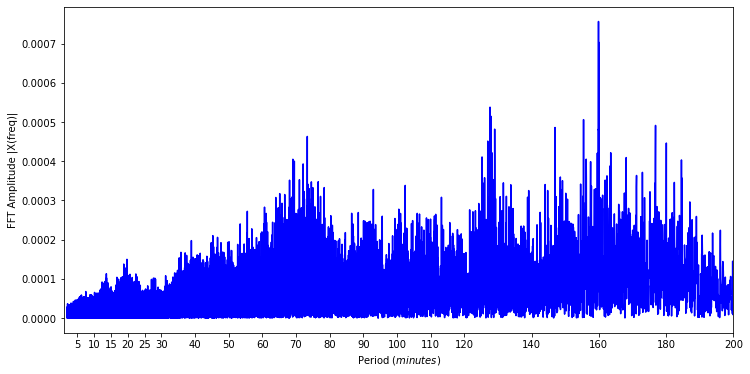

In [7]:
FFTanal(df_int_c.loc['2013-01-01':'2013-12-31'],5)

/var/folders/xy/7h7d693153l1mk26wyl2nst40000gn/T/ipykernel_11056/1323361282.py:5: RuntimeWarning:

divide by zero encountered in true_divide

/var/folders/xy/7h7d693153l1mk26wyl2nst40000gn/T/ipykernel_11056/1323361282.py:6: RuntimeWarning:

divide by zero encountered in true_divide



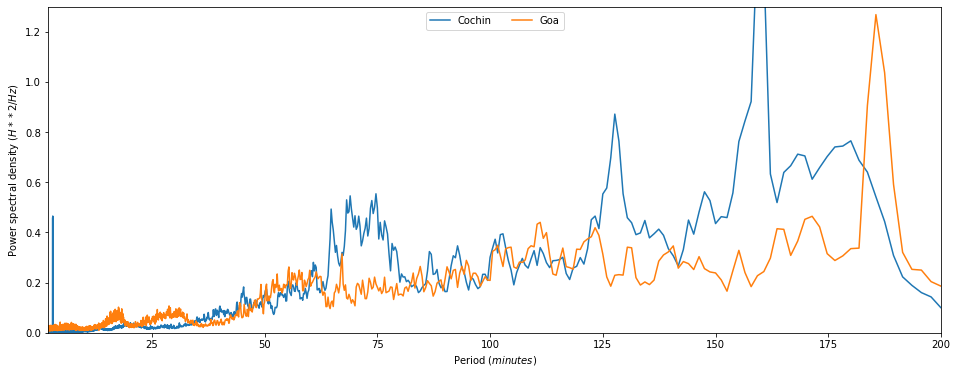

In [8]:
from scipy.signal import welch
f_c, psd_c = welch(df_int_c.loc['2011-01-01':'2016-12-31'],fs=1./60,window='hanning', nperseg=18000,noverlap=60,detrend='constant')
f_m, psd_m = welch(df_int_m.loc['2016-01-01':'2019-12-31'],fs=1./60,window='hanning', nperseg=18000,noverlap=60,detrend='constant')
plt.figure(figsize = (16, 6))
plt.plot(1/f_c/60,psd_c,label="Cochin")
plt.plot(1/f_m/60,psd_m,label="Goa")
plt.xlim(2, 200)
plt.ylim(0,1.3)
plt.legend(ncol=2, loc='upper center')
plt.xlabel('Period ($minutes$)')
plt.ylabel('Power spectral density ($H**2/Hz$)')
plt.show()

In [ ]:
import colorednoise as cn
beta = 1 # the exponent
samples=len(df_int)  # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples)
f1, psd1 = welch(y,fs=1/60,window='hanning', nperseg=7220,noverlap=60,detrend='constant')
#plt.figure(figsize = (16, 6))
#plt.plot(y/var(y))
#plt.plot(1/f/60,psd)
#plt.plot(1/f1/60,psd1)
#plt.xlim(0, 200)
#plt.ylim(0,2)

In [ ]:
from scipy import signal
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y
fps=1/60
cutoff = 1/(2*60*60)
filtered_sine = butter_highpass_filter(df_int,cutoff,fps)

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(df_int.index,df_int)
plt.plot(df_int.index,filtered_sine)

In [6]:
import pywt
coef, freqs=pywt.cwt(df_int, np.arange(1, 480),'morl')
plt.matshow(coef) # doctest: +SKIP
plt.show() # doctest: +SKIP

KeyboardInterrupt: 